**Data cleaning and question 2**

2) We are a small family who are looking for a house in the area with a grade of 7 and three bedrooms. How much will our new house likely cost?

As outlined in the introduction document, we know that properties with a high grade tend to be more expensive. What influences the price of properties with a grade of 7 and 3 bedrooms?

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

The grading system for houses in the King County area runs from 1 to 13. There are 8974 properties in our dataset with a grade of 7. We will select for these rows in the first instance.

In [4]:
df_grade7 = df.loc[df["grade"] == 7]

In [5]:
df_grade7.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711


In [6]:
df_grade7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8974 entries, 0 to 21596
Data columns (total 21 columns):
id               8974 non-null int64
date             8974 non-null object
price            8974 non-null float64
bedrooms         8974 non-null int64
bathrooms        8974 non-null float64
sqft_living      8974 non-null int64
sqft_lot         8974 non-null int64
floors           8974 non-null float64
waterfront       7974 non-null float64
view             8948 non-null float64
condition        8974 non-null int64
grade            8974 non-null int64
sqft_above       8974 non-null int64
sqft_basement    8974 non-null object
yr_built         8974 non-null int64
yr_renovated     7362 non-null float64
zipcode          8974 non-null int64
lat              8974 non-null float64
long             8974 non-null float64
sqft_living15    8974 non-null int64
sqft_lot15       8974 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 1.5+ MB


In [7]:
df_grade7_b3 = df_grade7.loc[df["bedrooms"] == 3]

In [8]:
df_grade7_b3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


In [9]:
df_grade7_b3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 21569
Data columns (total 21 columns):
id               4917 non-null int64
date             4917 non-null object
price            4917 non-null float64
bedrooms         4917 non-null int64
bathrooms        4917 non-null float64
sqft_living      4917 non-null int64
sqft_lot         4917 non-null int64
floors           4917 non-null float64
waterfront       4384 non-null float64
view             4900 non-null float64
condition        4917 non-null int64
grade            4917 non-null int64
sqft_above       4917 non-null int64
sqft_basement    4917 non-null object
yr_built         4917 non-null int64
yr_renovated     4023 non-null float64
zipcode          4917 non-null int64
lat              4917 non-null float64
long             4917 non-null float64
sqft_living15    4917 non-null int64
sqft_lot15       4917 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 845.1+ KB


**Sqft living**

In [10]:
df_grade7_b3['sqft_living'].isna().any()

False

In [11]:
df_grade7_b3['sqft_living'].dtype

dtype('int64')

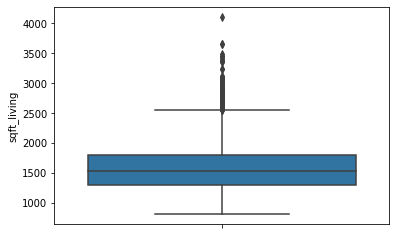

In [12]:
sns.boxplot(y = 'sqft_living', data = df_grade7_b3, showfliers = True)

We wanted to remove the outliers from the sqft living column, because otherwise huge properties would affect our model.

In [13]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #this calculates the interquartile range
   fence_low  = q1 - (1.5*iqr) #this removes the outliers at the lower range of the dataset for price
   fence_high = q3 + (1.5*iqr) #this removes the outliers at the higher range of the dataset for price
   df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
   return df_out

In [14]:
df3 = remove_outlier(df_grade7_b3,'sqft_living')

In [15]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 21569
Data columns (total 21 columns):
id               4817 non-null int64
date             4817 non-null object
price            4817 non-null float64
bedrooms         4817 non-null int64
bathrooms        4817 non-null float64
sqft_living      4817 non-null int64
sqft_lot         4817 non-null int64
floors           4817 non-null float64
waterfront       4293 non-null float64
view             4802 non-null float64
condition        4817 non-null int64
grade            4817 non-null int64
sqft_above       4817 non-null int64
sqft_basement    4817 non-null object
yr_built         4817 non-null int64
yr_renovated     3944 non-null float64
zipcode          4817 non-null int64
lat              4817 non-null float64
long             4817 non-null float64
sqft_living15    4817 non-null int64
sqft_lot15       4817 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 827.9+ KB


This has removed 100 or so properties from our dataset.

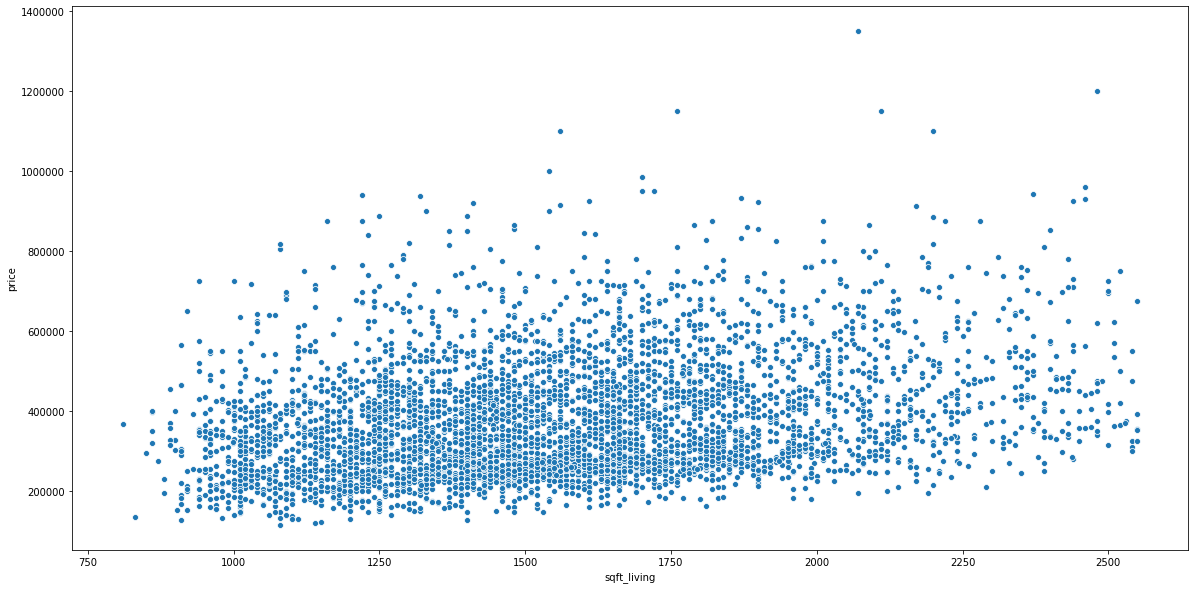

In [17]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price",
                      data=df3)

There is a very slight increase in price for houses with a grade 7 and 3 bathrooms when the size of the house increases.

**Bathrooms**

In [18]:
df3['bathrooms'].isna().any()

False

In [19]:
df3['bathrooms'].dtype

dtype('float64')

In [20]:
df3['bathrooms'].value_counts()

1.75    1187
1.00    1117
2.50     672
2.00     640
1.50     578
2.25     476
2.75      73
3.00      38
3.25      13
3.50      12
0.75       7
3.75       2
1.25       2
Name: bathrooms, dtype: int64

We don't have any extreme values for our bathrooms here - we have chosen not to remove outliers.

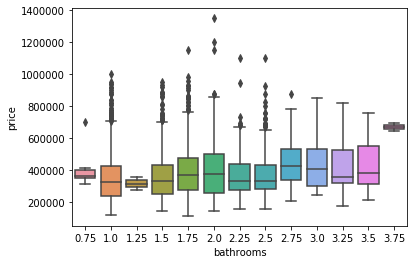

In [21]:
sns.boxplot(x = 'bathrooms', y = 'price', data = df3, showfliers = True)

There is a slight trend here: as the number of bathrooms increases, the price of a house also increases slightly.

**Sqft lot**

In [22]:
df3['sqft_lot'].isna().any()

False

In [23]:
df['sqft_lot'].dtype

dtype('int64')

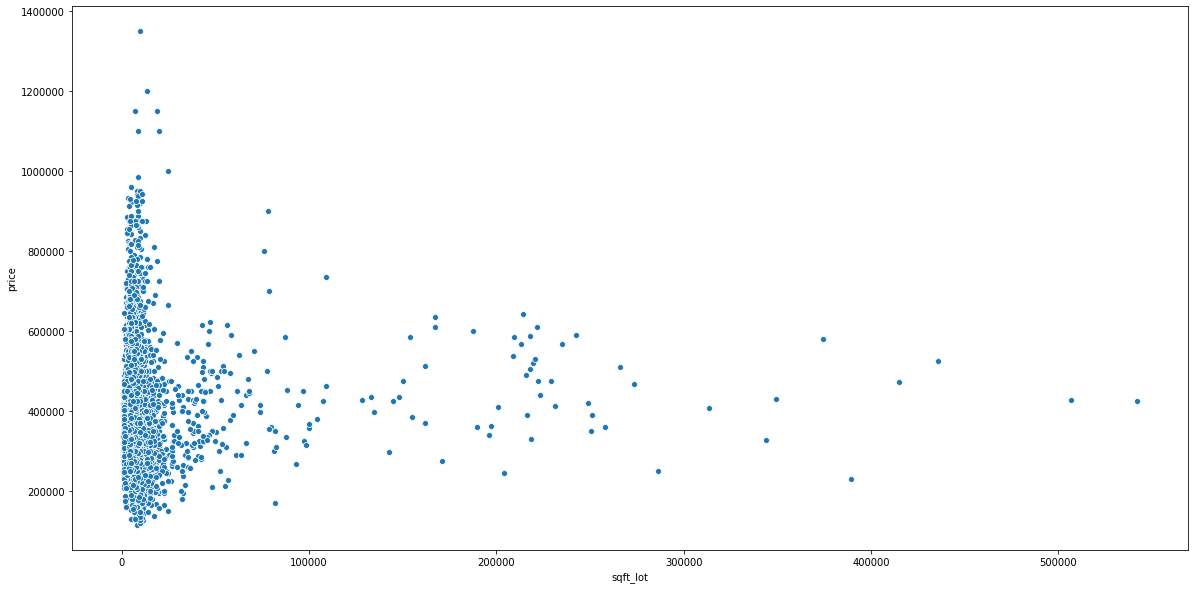

In [24]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_lot", y="price",
                      data=df3)

We have some properties which have a large amount of space as part of their lot, which will affect our model. However, this does include larger properties which are not inside the city centre and may interest families.

**Floors**

In [25]:
df3['floors'].dtype

dtype('float64')

In [26]:
df3['floors'].isna().any()

False

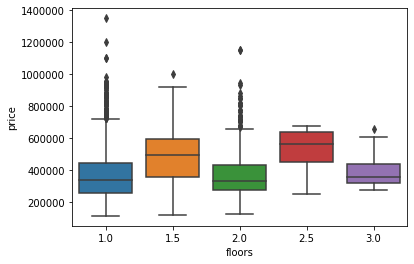

In [27]:
sns.boxplot(x = 'floors', y = 'price', data = df3, showfliers = True)

There seems to be a slight increase in the price of a house as the number of floors increases. However, this effect tails off beyond 2.5 floors.

**Waterfront**

In [28]:
df3['waterfront'].value_counts()

0.0    4289
1.0       4
Name: waterfront, dtype: int64

The effect of waterfront on our dataset will not be able to be explored, since there are so few properties of this type which have a waterfront view.

**Year renovated**

In [29]:
df3['yr_renovated'].isna().any()

True

We need to replace the null values in the year renovated column with a meaningful value.

In [30]:
df3['yr_renovated'].mode()

0    0.0
dtype: float64

In [31]:
df3['yr_renovated'].fillna(int(0), inplace = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [32]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [33]:
df3['yr_renovated'].isna().any()

False

In [34]:
df3.loc[df['yr_renovated'] > 0, 'renovated'] = "Yes"

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,NaN
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,NaN
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,NaN
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,NaN
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,NaN


In [36]:
df3.fillna(int(0), inplace = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [37]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0


In [38]:
df3['renovated'].value_counts()

0      4707
Yes     110
Name: renovated, dtype: int64

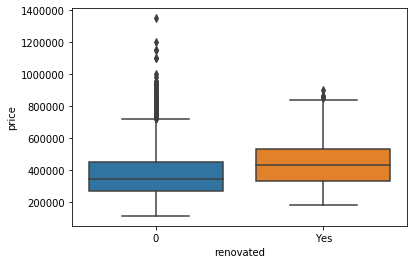

In [39]:
sns.boxplot(x = 'renovated', y = 'price', data = df3, showfliers = True)

There seems to be a slight increase in price when houses are renovated.

**Condition**

In [40]:
df3['condition'].isna().sum()

0

In [41]:
df3['condition'].value_counts()

3    2824
4    1540
5     413
2      37
1       3
Name: condition, dtype: int64

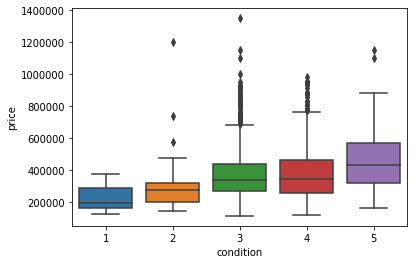

In [42]:
sns.boxplot(x = 'condition', y = 'price', data = df3, showfliers = True)

There is a clear relationship here: as the condition of a house improves, so does its condition.

**Latitude**

In [43]:
df3['lat'].isna().any() 

False

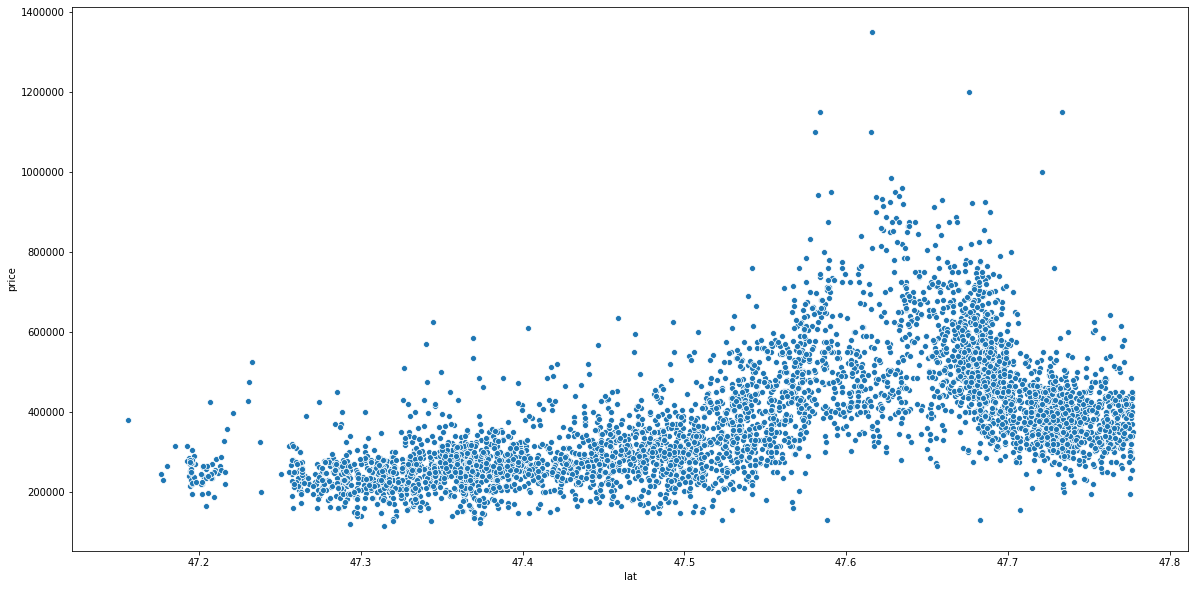

In [44]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price",
                      data=df3)

There seems to be an increase in price of houses which are around the 47.6 and 47.7 latitude.

**Longitude**

In [45]:
df3['long'].isna().any()

False

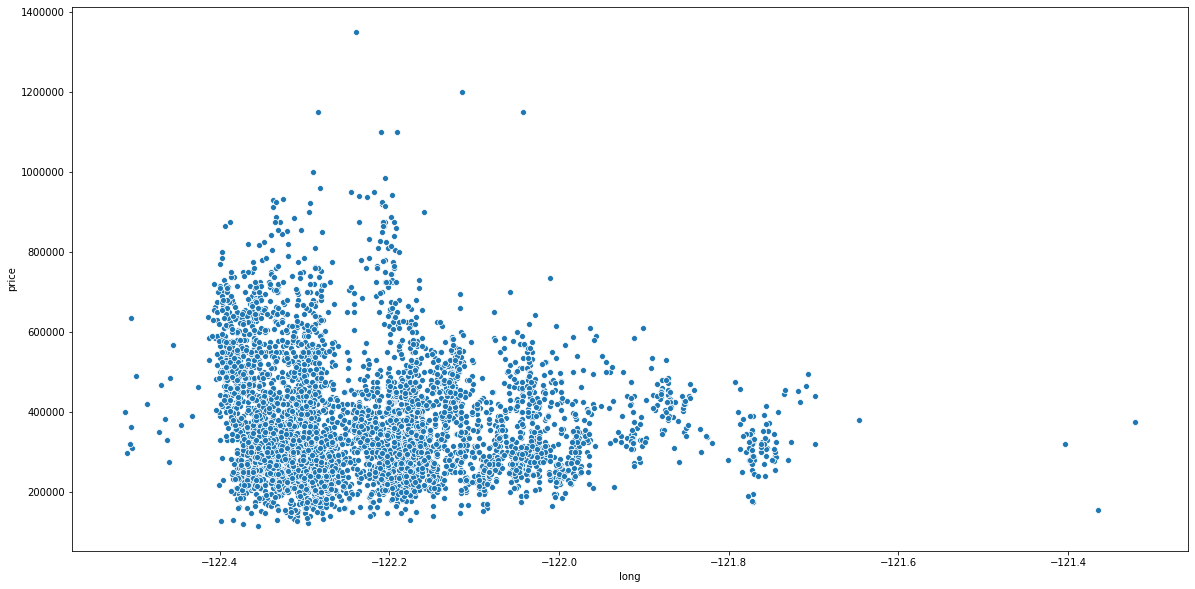

In [46]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="long", y="price",
                      data=df3)

There is a higher concentration of houses around the -122.4 and -122.2 longitudes. The price range of houses is wider here.

**Sqft living nearest 15 neighbours**

In [47]:
df3['sqft_living15'].isna().any()

False

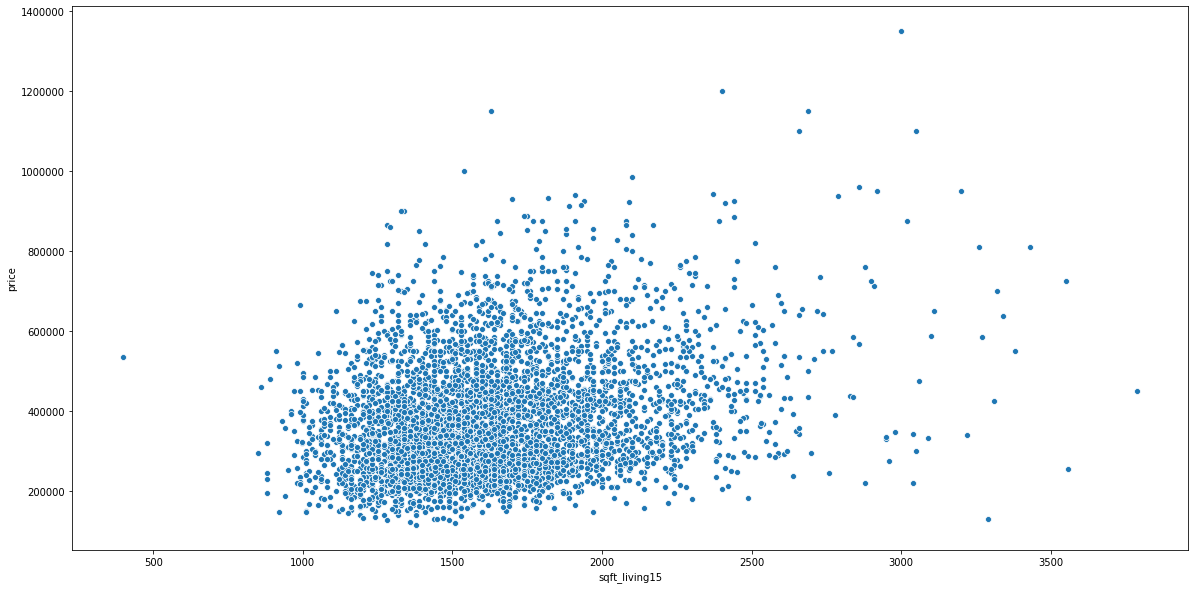

In [48]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living15", y="price",
                      data=df3)

There seems to be a relationship here: the larger the mean size of a house's nearest 15 neighbours, the larger the house itself will be.

**Year built**

We can also calculate the age of a house and see whether this influences its price. We must create a new column for this.

In [49]:
df3['yr_built'].isna().sum()

0

In [50]:
df3['yr_built'].value_counts()

1968    156
1967    140
1954    128
1959    122
1955    108
1977    105
1962    104
1969    103
1978     94
1952     90
1979     87
1956     83
2003     82
1985     81
1960     79
1966     79
1963     78
1953     78
1980     77
1987     75
1957     73
1961     72
1958     72
1981     71
1986     70
1976     66
2004     64
1984     63
1994     60
2005     60
       ... 
1922     18
2011     17
1900     17
1945     16
1912     15
1918     13
1921     12
1913     11
1916     11
1923     11
1915     11
1903     11
1938     10
1905     10
2013      9
1930      9
1917      9
1911      8
1904      8
1907      7
1902      7
1937      7
1934      5
1931      5
1901      5
1914      4
1936      4
1933      3
1935      3
1932      2
Name: yr_built, Length: 115, dtype: int64

In [51]:
df3['date'].dtype

dtype('O')

In [52]:
df3['yr_built'].dtype

dtype('int64')

In [53]:
df3['year_sold'] = df3[['date']].applymap(lambda x: x[-4:])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0,2014
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0,2015
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0,2015
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,2015


In [55]:
df3['year_sold'] = df3['year_sold'].astype('int64')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df3['age_of_house'] = df3['year_sold'] - df3['yr_built']

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year_sold,age_of_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014,59
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,0,2014,19
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1963,0.0,98198,47.4095,-122.315,1650,9711,0,2015,52
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1960,0.0,98146,47.5123,-122.337,1780,8113,0,2015,55
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,2003,0.0,98038,47.3684,-122.031,2390,7570,0,2015,12


In [58]:
df3['age_of_house'].isna().any()

False

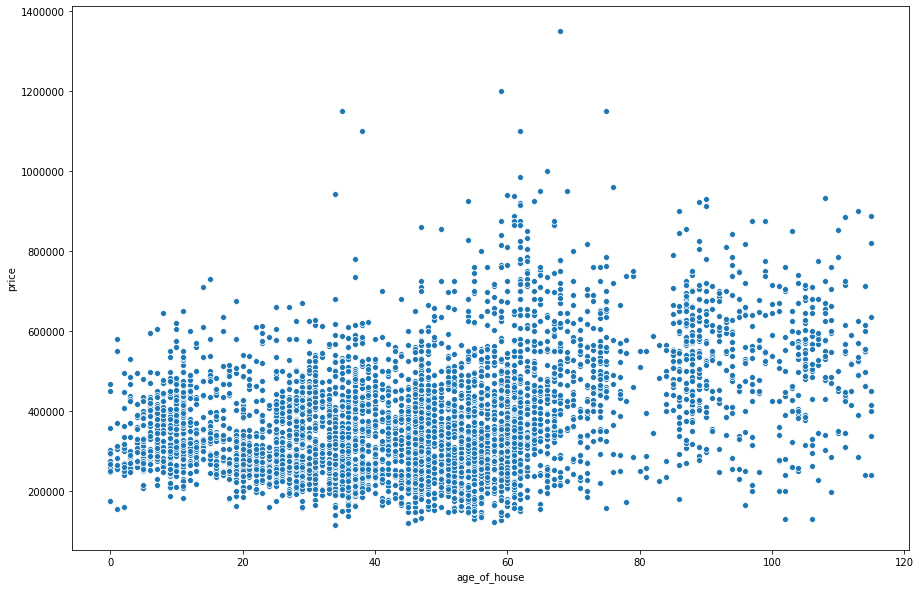

In [59]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x="age_of_house", y="price",
              data=df3)

The widest range of price for houses is for houses which are 60 years old. There is a slight trend which shows that the older a house, the wider the price range it may fall into.

**Sqft basement**

We need to delete or replace the values which have a '?' in them for the basement feature. Given that the mode for this feature is 0, we can replace them with a 0.

In [60]:
sqft_indices = df3.loc[df3['sqft_basement'] == '?'].index

In [61]:
sqft_indices

Int64Index([    6,   112,   645,   664,   755,  1205,  1669,  1852,  2041,
             2126,  2133,  2152,  3327,  3913,  4008,  4372,  4591,  4618,
             4776,  4997,  5371,  5403,  5607,  6388,  6984,  7311,  7356,
             7566,  7588,  7589,  8038,  8985,  9758,  9809,  9864, 10108,
            10175, 10390, 10506, 10783, 10910, 11000, 11201, 11319, 11501,
            11643, 11698, 11992, 12361, 12458, 12482, 12538, 12562, 12607,
            12795, 13278, 13673, 13826, 13912, 14652, 15185, 15276, 15610,
            15634, 15686, 16021, 16188, 16229, 16234, 16460, 16552, 16685,
            16861, 17097, 17253, 17509, 17528, 18207, 18413, 18465, 18714,
            18781, 19601, 19634, 20934, 21000],
           dtype='int64')

In [62]:
df3.loc[sqft_indices, ['sqft_basement']] = '0.0'
df3['sqft_basement'].astype('float64')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0           0.0
6           0.0
7           0.0
8         730.0
9           0.0
12          0.0
13          0.0
16          0.0
19          0.0
28        730.0
43          0.0
48          0.0
50          0.0
52        410.0
61          0.0
64        550.0
68          0.0
71          0.0
74        700.0
77          0.0
78        500.0
92          0.0
96          0.0
98        600.0
101       540.0
104         0.0
106       500.0
112         0.0
113      1000.0
121         0.0
          ...  
21349       0.0
21354       0.0
21360     250.0
21362       0.0
21370       0.0
21374       0.0
21375       0.0
21384       0.0
21388       0.0
21395     230.0
21404       0.0
21406     170.0
21413       0.0
21421       0.0
21428       0.0
21430       0.0
21431       0.0
21432       0.0
21439       0.0
21456     240.0
21459       0.0
21510       0.0
21515     330.0
21522     200.0
21523       0.0
21525     280.0
21534     450.0
21554     610.0
21568     320.0
21569       0.0
Name: sqft_basement, Len

In [63]:
df3['sqft_basement'].isna().sum()

0

In [64]:
df3['sqft_basement'].value_counts()

0.0       3115
500.0       82
600.0       76
400.0       70
530.0       48
700.0       48
300.0       45
450.0       42
480.0       38
800.0       37
550.0       29
570.0       28
440.0       28
360.0       26
430.0       26
580.0       24
900.0       23
650.0       23
470.0       22
750.0       22
510.0       22
420.0       21
290.0       21
520.0       21
620.0       21
350.0       21
200.0       20
240.0       20
460.0       20
340.0       19
          ... 
230.0        4
160.0        4
1080.0       4
910.0        3
1110.0       3
1160.0       3
970.0        3
1180.0       3
1170.0       3
1010.0       3
110.0        2
1150.0       2
1100.0       2
1120.0       2
414.0        2
1230.0       2
1050.0       2
1210.0       1
70.0         1
768.0        1
1200.0       1
1250.0       1
1220.0       1
1330.0       1
1270.0       1
65.0         1
60.0         1
1240.0       1
518.0        1
1245.0       1
Name: sqft_basement, Length: 125, dtype: int64

In [65]:
df3['sqft_basement'].mode()

0    0.0
dtype: object

In [66]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year_sold,age_of_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014,59
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,0,2014,19
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1963,0.0,98198,47.4095,-122.315,1650,9711,0,2015,52
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1960,0.0,98146,47.5123,-122.337,1780,8113,0,2015,55
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,2003,0.0,98038,47.3684,-122.031,2390,7570,0,2015,12
